# BOT or NOT cresi-2015 Modelling

### level 1 : User level.
### level 1 : User + Tweets level.
### level 1 : User + Network level.
### level 1 : User + Tweets +Network level


In [1]:
# Imports

import glob
import string
import ast

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold



# import and check data

In [2]:
User        = pd.read_csv('/Users/sunqiaoyubing/Desktop/User.csv', encoding='latin-1')
User_tweets = pd.read_csv('/Users/sunqiaoyubing/Desktop/User_tweets.csv', encoding='latin-1')
User_network= pd.read_csv('/Users/sunqiaoyubing/Desktop/new_User_network.csv', encoding='latin-1')

#All         = pd.read_csv('/Users/sunqiaoyubing/Desktop/All.csv', encoding='latin-1')


In [289]:
Tweetsle = pd.read_csv("/Users/sunqiaoyubing/Desktop/Tweetsle.csv", encoding='latin-1',sep=';')
All = pd.merge(Tweetsle, User_network, on='id', how='inner')

All.info()
All['avg_retweet_count'] = All['avg_retweet_count'].replace(np.nan, 0)
All['avg_favorite_count'] = All['avg_favorite_count'].replace(np.nan, 0)

All['avg_retweet_count'] = pd.to_numeric(All['avg_retweet_count'],errors='coerce')
All['avg_favorite_count'] = pd.to_numeric(All['avg_favorite_count'],errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583 entries, 0 to 1582
Data columns (total 30 columns):
id                                     1583 non-null int64
avg_ext_diversity                      1583 non-null float64
avg_retweet_count                      1583 non-null object
avg_reply_count                        1583 non-null float64
avg_favorite_count                     1583 non-null object
avg_num_hashtags                       1583 non-null float64
avg_num_urls                           1583 non-null float64
avg_num_mentions                       1583 non-null float64
avg_in_apply                           1583 non-null float64
avg_friends_listed_count               1583 non-null float64
avg_friends_default_profile            1583 non-null float64
avg_friends_geo_enabled                1583 non-null float64
avg_friends_profile_background_tile    1583 non-null float64
friend_Bot_rate                        1583 non-null float64
avg_friends_sn_length                  1583

In [296]:
#User.head()
#User_tweets.info()
#User_network.info()
All.info()
#Train1.info()
All['avg_retweet_count'] = All['avg_retweet_count'].replace(np.nan, 0)
All['avg_favorite_count'] = All['avg_favorite_count'].replace(np.nan, 0)
User_tweets['avg_retweet_count'] = User_tweets['avg_retweet_count'].replace(np.nan, 0)
User_tweets['avg_favorite_count'] = User_tweets['avg_favorite_count'].replace(np.nan, 0)
All['avg_retweet_count'] = pd.to_numeric(All['avg_retweet_count'],errors='coerce')
All['avg_favorite_count'] = pd.to_numeric(All['avg_favorite_count'],errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583 entries, 0 to 1582
Data columns (total 30 columns):
id                                     1583 non-null int64
avg_ext_diversity                      1583 non-null float64
avg_retweet_count                      1583 non-null float64
avg_reply_count                        1583 non-null float64
avg_favorite_count                     1583 non-null float64
avg_num_hashtags                       1583 non-null float64
avg_num_urls                           1583 non-null float64
avg_num_mentions                       1583 non-null float64
avg_in_apply                           1583 non-null float64
avg_friends_listed_count               1583 non-null float64
avg_friends_default_profile            1583 non-null float64
avg_friends_geo_enabled                1583 non-null float64
avg_friends_profile_background_tile    1583 non-null float64
friend_Bot_rate                        1583 non-null float64
avg_friends_sn_length                  15

In [297]:
## 1. All data split
Train, Test = train_test_split(All, test_size=0.2, random_state=25)
Train.shape, Test.shape

((1266, 30), (317, 30))

In [298]:
## 2. User level data split
Train1,Test1 = train_test_split(User, test_size=0.2, random_state=25)
Train1.shape, Test1.shape

((4240, 13), (1061, 13))

In [299]:
## 3. User_Tweets level data split
Train2, Test2 = train_test_split(User_tweets, test_size=0.2, random_state=25)
Train2.shape, Test2.shape



((4112, 21), (1029, 21))

In [300]:
## 4. User_Network level data split
Train3, Test3 = train_test_split(User_network, test_size=0.2, random_state=25)
Train1.shape, Test1.shape

((4240, 13), (1061, 13))

In [301]:
xset = Train
X_all = xset.drop(['id','Bot'], axis=1)
y_all = xset['Bot']

In [302]:
X_all.info()
X_all['avg_retweet_count'] = X_all['avg_retweet_count'].replace(np.nan, 0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 74 to 1156
Data columns (total 28 columns):
avg_ext_diversity                      1266 non-null float64
avg_retweet_count                      1266 non-null float64
avg_reply_count                        1266 non-null float64
avg_favorite_count                     1266 non-null float64
avg_num_hashtags                       1266 non-null float64
avg_num_urls                           1266 non-null float64
avg_num_mentions                       1266 non-null float64
avg_in_apply                           1266 non-null float64
avg_friends_listed_count               1266 non-null float64
avg_friends_default_profile            1266 non-null float64
avg_friends_geo_enabled                1266 non-null float64
avg_friends_profile_background_tile    1266 non-null float64
friend_Bot_rate                        1266 non-null float64
avg_friends_sn_length                  1266 non-null float64
avg_friends_desc_length               

# Feature Selection

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

Optimal number of features : 23


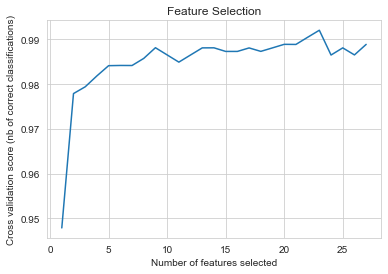

In [410]:
# Create the RFE object and compute a cross-validated score.
model = ExtraTreesClassifier()
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(20),scoring='accuracy')
rfecv.fit(X_all, y_all)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title('Feature Selection')
plt.show()

In [233]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_all, y_all)

#Add features and their importances to a dictionary
feature_imp_dict = dict(zip(X_all.columns.values, model.feature_importances_))

for x in sorted(zip(model.feature_importances_,list(X_all)))[::-1]:
    print (x)

(0.28043384468736043, 'avg_in_apply')
(0.14625008050870236, 'default_profile')
(0.10305703439966658, 'geo_enabled')
(0.08730883855516727, 'avg_friends_default_profile')
(0.07045744161429958, 'avg_num_mentions')
(0.04220676087391043, 'avg_friends_geo_enabled')
(0.0383662452638479, 'avg_num_urls')
(0.03164846931579744, 'profile_background_tile')
(0.023691590931497454, 'avg_friends_listed_count')
(0.020825902405646364, 'avg_friends_profile_background_tile')
(0.019865310836843016, 'avg_friends_sn_length')
(0.017304671176865564, 'avg_ext_diversity')
(0.015522150445763957, 'sn_length')
(0.01406630840925401, 'avg_num_hashtags')
(0.013769800217471293, 'statuses_count')
(0.011766555041637618, 'followers_count')
(0.01057517018977153, 'friends_count')
(0.008278347761834434, 'avg_reply_count')
(0.007656420296590807, 'avg_friends_desc_length')
(0.006448756820258044, 'avg_friends_name_length')
(0.006137128081264884, 'desc_length')
(0.005824430992419157, 'avg_favorite_count')
(0.0049811921655217245, 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [234]:
ValidSet, test_all = train_test_split(Test, test_size=0.5, random_state=25)
ValidSet.shape, test_all.shape




((158, 30), (159, 30))

In [235]:
#define a function to print ROC curves. 
#It should take in only arrays/lists of predictions and outcomes
from sklearn.metrics import roc_curve, auc

def plotUnivariateROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #Student input code here
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

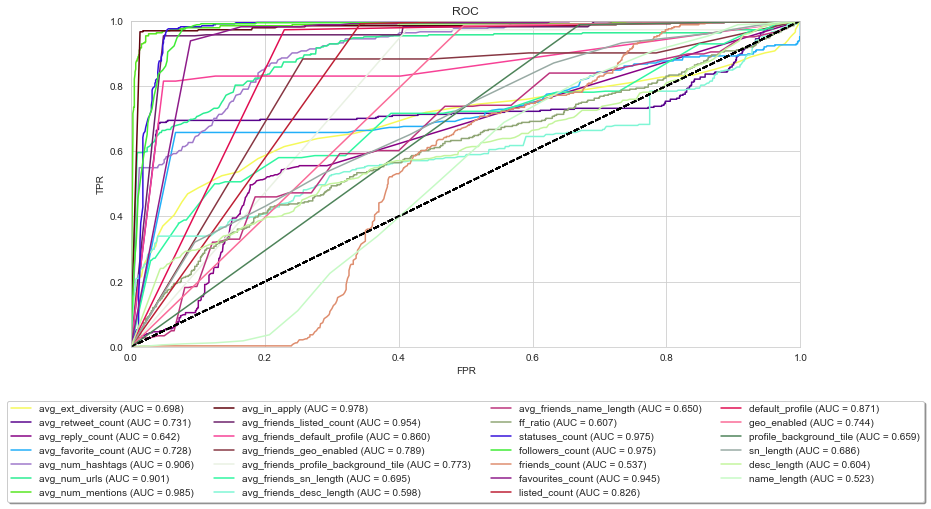

In [236]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

#Plot the univariate AUC on the training data. Store the AUC

#Student put code here
feature_auc_dict = {}
for col in X_all.columns:
    feature_auc_dict[col] = plotUnivariateROC(X_all[col], y_all, col)


# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [237]:
#Add auc and mi each to a single dataframe
df_auc = pd.DataFrame(pd.Series(feature_auc_dict), columns = ['auc'])
df_imp = pd.DataFrame(pd.Series(feature_imp_dict), columns = ['imp'])

#Now merge the two on the feature name
feat_imp_df = df_auc.merge(df_imp, left_index = True, right_index = True)
feat_imp_df

,auc,imp
avg_ext_diversity,0.698157,0.017305
avg_retweet_count,0.730682,0.003030
avg_reply_count,0.642013,0.008278
avg_favorite_count,0.728087,0.005824
avg_num_hashtags,0.906379,0.014066
avg_num_urls,0.900882,0.038366
avg_num_mentions,0.985204,0.070457
avg_in_apply,0.977795,0.280434
avg_friends_listed_count,0.953556,0.023692
avg_friends_default_profile,0.859589,0.087309


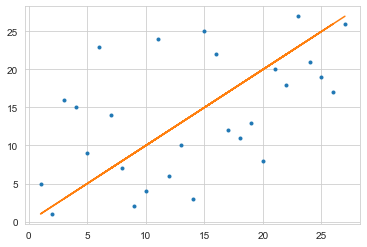

In [353]:
#Now create a df that holds the ranks of auc and mi 
feat_ranks = feat_imp_df.rank(axis = 0, ascending = False)

#Plot the two ranks
plt.plot(feat_ranks.auc, feat_ranks.imp, '.')
#Plot a y=x reference line
plt.plot(feat_ranks.auc, feat_ranks.auc,)

In [239]:
#Now create lists of top 10 features for both auc and mi
top5_auc = list(feat_ranks[(feat_ranks.auc <= 26)].index.values)
top5_imp = list(feat_ranks[(feat_ranks.imp <= 26)].index.values)
for x in zip(top5_auc, top5_imp):
    print (x)

('avg_ext_diversity', 'avg_ext_diversity')
('avg_retweet_count', 'avg_retweet_count')
('avg_reply_count', 'avg_reply_count')
('avg_favorite_count', 'avg_favorite_count')
('avg_num_hashtags', 'avg_num_hashtags')
('avg_num_urls', 'avg_num_urls')
('avg_num_mentions', 'avg_num_mentions')
('avg_in_apply', 'avg_in_apply')
('avg_friends_listed_count', 'avg_friends_listed_count')
('avg_friends_default_profile', 'avg_friends_default_profile')
('avg_friends_geo_enabled', 'avg_friends_geo_enabled')
('avg_friends_profile_background_tile', 'avg_friends_profile_background_tile')
('avg_friends_sn_length', 'avg_friends_sn_length')
('avg_friends_desc_length', 'avg_friends_desc_length')
('avg_friends_name_length', 'avg_friends_name_length')
('ff_ratio', 'statuses_count')
('statuses_count', 'followers_count')
('followers_count', 'friends_count')
('friends_count', 'favourites_count')
('favourites_count', 'listed_count')
('listed_count', 'default_profile')
('default_profile', 'geo_enabled')
('geo_enabled',

# User level


In [427]:
from sklearn.preprocessing import StandardScaler

xset1 = Train1
X_all1 = xset1.drop(['id','Bot'], axis=1)
y_all1 = xset1['Bot']

# initial
feature1=['statuses_count','followers_count','friends_count','favourites_count', 
         'listed_count','default_profile','geo_enabled','profile_background_tile',
        'sn_length','desc_length','name_length']
# final
#feature1=['statuses_count','followers_count','friends_count','listed_count',
#          'default_profile','geo_enabled','sn_length','desc_length','name_length']

X_train1 = xset1[feature1]
y_train1 = xset1['Bot']
X_test1 = Test1[feature1]
y_test1 = Test1['Bot']

fs_m1 = StandardScaler().fit(X_train1)
Xs_train1 = fs_m1.transform(X_train1)
Xs_test1 = fs_m1.transform(X_test1)



### logistic regression model 1


In [418]:
#logistics regression 1
import statsmodels.api as sm
logit_model=sm.Logit(y_train1,Xs_train1)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.265285
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.597    
Dependent Variable: Bot              AIC:              2271.6197
Date:               2019-08-21 12:28 BIC:              2341.4952
No. Observations:   4240             Log-Likelihood:   -1124.8  
Df Model:           10               LL-Null:          -2790.9  
Df Residuals:       4229             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     10.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
x1        -3.1057    0.2849  -10.9013  0.0000   -3.6641   -2.5473
x2       -27.2869    2.5244  -10.8093  0.0000  -32.2346  -22.3392
x3     

In [411]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train1,y_train1)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.9584905660377359


In [433]:
#logreg = LogisticRegression(penalty='l2')
logreg = LogisticRegression(penalty='l2',C=1.0)
logreg.fit(X_train1, y_train1)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [416]:
y_pred = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.96


In [434]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       387
           1       0.99      0.95      0.97       674

    accuracy                           0.96      1061
   macro avg       0.95      0.97      0.96      1061
weighted avg       0.96      0.96      0.96      1061



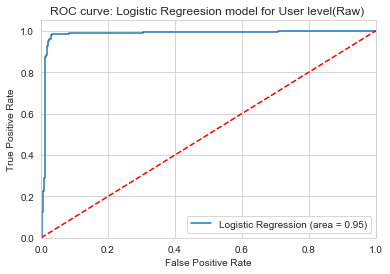

In [436]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test1, logreg.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, logreg.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: Logistic Regreesion model for User level(Raw) ')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


### Decision Tree model 1

In [33]:
conda env list


# conda environments:
#
base                  *  /Applications/anaconda3
                         /Users/sunqiaoyubing/anaconda2
                         /Users/sunqiaoyubing/anaconda3
                         /Users/sunqiaoyubing/untitled
                         /Users/sunqiaoyubing/untitled1


Note: you may need to restart the kernel to use updated packages.


In [437]:
# Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train1, y_train1)

# Set the clf to the best combination of parameters
clf1 = grid_obj.best_estimator_

clf1.fit(X_train1, y_train1)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [438]:
clf1.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:

pip install pydotplus


Note: you may need to restart the kernel to use updated packages.


In [42]:
conda install graphviz


Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    conda-4.7.11               |           py37_0         3.0 MB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.5              |       h1de35cc_0          60 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4               |       h060686c_0         455 KB
    pixman-0.38.0              |       h1de35cc_0         341 KB
    ------------------------------------------------------------
                                           Total:        11.7 MB

Th

In [96]:
# To view the decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature1,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('User_Tree.png')
Image(graph.create_png())
export_graphviz(clf1) 








'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 78.5\\ngini = 0.465\\nsamples = 4240\\nvalue = [1563, 2677]"] ;\n1 [label="X[2] <= 143.0\\ngini = 0.12\\nsamples = 2678\\nvalue = [171, 2507]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 4.5\\ngini = 0.494\\nsamples = 271\\nvalue = [150, 121]"] ;\n1 -> 2 ;\n3 [label="X[1] <= 6.0\\ngini = 0.216\\nsamples = 130\\nvalue = [16, 114]"] ;\n2 -> 3 ;\n4 [label="X[2] <= 11.5\\ngini = 0.137\\nsamples = 122\\nvalue = [9, 113]"] ;\n3 -> 4 ;\n5 [label="X[0] <= 2.5\\ngini = 0.473\\nsamples = 13\\nvalue = [8, 5]"] ;\n4 -> 5 ;\n6 [label="gini = 0.469\\nsamples = 8\\nvalue = [3, 5]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 5\\nvalue = [5, 0]"] ;\n5 -> 7 ;\n8 [label="X[6] <= 9.5\\ngini = 0.018\\nsamples = 109\\nvalue = [1, 108]"] ;\n4 -> 8 ;\n9 [label="gini = 0.32\\nsamples = 5\\nvalue = [1, 4]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 104\\nvalue = [0, 104]"] ;\n8 -> 10 ;\n11 [label="gini = 0.21

In [98]:
from sklearn.model_selection import cross_val_score
predictions1 = clf1.predict(X_test1)
print(accuracy_score(y_test1, predictions1))
print(np.array(cross_val_score(clf1, X_train1, y_train1, cv=10)).mean())
print(f1_score(y_test1,predictions1))

0.9802073515551367
0.9768844913584328
0.9844559585492229


In [439]:
clf_probs1 = clf1.predict_proba(X_test1)[:, 1]
roc_value = roc_auc_score(y_test1, clf_probs1)
print(roc_value)

0.9848929220435672


In [215]:
roc_value = roc_auc_score(y_test1, predictions1); roc_value

0.9778195661675061

In [216]:
predictions1

array([1, 1, 0, ..., 1, 0, 1])

In [217]:
clf_probs1  

array([1. , 1. , 0. , ..., 0.8, 0. , 1. ])

In [530]:
im1 = pd.DataFrame({'feature': list(X_train1.columns),
                   'importance': clf1.feature_importances_}).sort_values('importance', ascending = False)
im1

,feature,importance
0,statuses_count,0.769433
2,friends_count,0.124117
1,followers_count,0.065384
9,desc_length,0.034541
3,favourites_count,0.004875
4,listed_count,0.001207
10,name_length,0.000242
8,sn_length,0.000201
5,default_profile,0.000000
6,geo_enabled,0.000000


In [531]:
list(X_train1.columns)

['statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count',
 'default_profile',
 'geo_enabled',
 'profile_background_tile',
 'sn_length',
 'desc_length',
 'name_length']

### Random Forest Model 1

In [440]:
#Random forest model
rf_clf1 = RandomForestClassifier()

parameters = {'n_estimators': [10, 20, 25, 50, 100, 300, 500, 800]}

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(rf_clf1, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train1, y_train1)

# Set the clf to the best combination of parameters
rf_clf1 = grid_obj.best_estimator_

rf_clf1.fit(X_train1, y_train1)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [441]:
rf_clf1_predictions = rf_clf1.predict(X_test1)

In [442]:
rf_clf1_predictions = rf_clf1.predict(X_test1)
rf_probs = rf_clf1.predict_proba(X_test1)[:, 1]

In [443]:
roc_value = roc_auc_score(y_test1, rf_probs)
print(roc_value )

0.9976958878690989


In [432]:
fi1 = pd.DataFrame({'feature': list(X_train1.columns),
                   'importance': rf_clf1.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi1

,feature,importance
0,statuses_count,0.309013
1,followers_count,0.220743
2,friends_count,0.144104
3,favourites_count,0.141044
5,default_profile,0.058906
4,listed_count,0.043882
9,desc_length,0.030354
6,geo_enabled,0.025060
10,name_length,0.011180
8,sn_length,0.010658


In [444]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,rf_clf1_predictions))
print(classification_report(y_test1,rf_clf1_predictions))
print(accuracy_score(y_test1, rf_clf1_predictions))


[[380   7]
 [ 10 664]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       387
           1       0.99      0.99      0.99       674

    accuracy                           0.98      1061
   macro avg       0.98      0.98      0.98      1061
weighted avg       0.98      0.98      0.98      1061

0.9839773798303487


In [188]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier(base_estimator=rf_clf1, n_estimators=50)
ada1.fit(X_train1, y_train1)
y1 = ada1.predict(X_test1)
accuracy_score(y1, y_test1)

0.9830348727615457

In [189]:
a_svm1 = cross_val_score(ada1, X_train1, y_train1, cv=10)
print([a_svm1,np.mean(a_svm1)])

[array([0.98432602, 0.97798742, 0.97169811, 0.98427673, 0.98742138,
       0.98742138, 0.98427673, 0.98742138, 0.99371069, 0.9873817 ]), 0.9845921558756796]


# level 2: User + Tweets level

In [447]:
#logistics regression
from sklearn.preprocessing import StandardScaler
xset2 = Train2
#X_all = xset1.drop(['id','Bot'], axis=1)
#y_all = xset1['Bot']


feature2=['statuses_count','followers_count','friends_count','favourites_count','avg_num_mentions',
        'listed_count','default_profile','geo_enabled','profile_background_tile','avg_in_apply',
        'sn_length','desc_length','name_length','avg_ext_diversity','avg_retweet_count',
         'avg_reply_count', 'avg_favorite_count','avg_num_hashtags', 'avg_num_urls']
#revised
#feature2=['followers_count','friends_count','avg_num_mentions',
#         'listed_count','default_profile','geo_enabled',
#         'desc_length','name_length','avg_retweet_count',
#         'avg_reply_count','avg_num_hashtags', 'avg_num_urls']

X_train2 = xset2[feature2]
y_train2 = xset2['Bot']
X_test2 = Test2[feature2]
y_test2 = Test2['Bot']

fs_m2 = StandardScaler().fit(X_train2)
Xs_train2 = fs_m2.transform(X_train2)
Xs_test2 = fs_m2.transform(X_test2)


## Logistics regression model 2

In [366]:
import statsmodels.api as sm
logit_model2=sm.Logit(y_train2,Xs_train2)
result2=logit_model2.fit()
print(result2.summary2())



Optimization terminated successfully.
         Current function value: 0.073828
         Iterations 15
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.888   
Dependent Variable: Bot              AIC:              645.1637
Date:               2019-08-21 05:03 BIC:              765.2753
No. Observations:   4112             Log-Likelihood:   -303.58 
Df Model:           18               LL-Null:          -2721.4 
Df Residuals:       4093             LLR p-value:      0.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     15.0000                                    
----------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
----------------------------------------------------------------
x1        0.3116    0.2658    1.1723  0.2411   -0.2094    0.8325
x2      -65.6971    5.2002  -12.6335  0.0000  -75.8893  -55.5048
x3        4.1324    0

In [448]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train2,y_train2)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lb

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the numb

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9824902723735408


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [449]:
#logreg = LogisticRegression()
logreg = LogisticRegression(C=0.1,penalty='l2')
logreg.fit(X_train2, y_train2)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [450]:
y_pred = logreg.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.97


In [451]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       399
           1       0.97      0.98      0.98       630

    accuracy                           0.97      1029
   macro avg       0.97      0.97      0.97      1029
weighted avg       0.97      0.97      0.97      1029



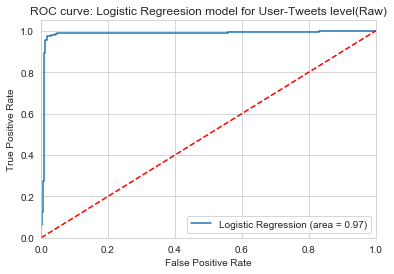

In [453]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test2, logreg.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test2, logreg.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: Logistic Regreesion model for User-Tweets level(Raw)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Decision Tree model 2 

In [101]:
# Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'criterion': ['gini'],
              'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the clf to the best combination of parameters
clf2 = grid_obj.best_estimator_

clf2.fit(X_train2, y_train2)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
# To view the decision Tree

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature2,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('User_Tweets_Tree.png')
Image(graph.create_png())
export_graphviz(clf2) 

#import numpy as np

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 81.5\\ngini = 0.469\\nsamples = 4112\\nvalue = [1544, 2568]"] ;\n1 [label="X[2] <= 161.5\\ngini = 0.118\\nsamples = 2567\\nvalue = [161, 2406]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[4] <= 0.009\\ngini = 0.495\\nsamples = 253\\nvalue = [139, 114]"] ;\n1 -> 2 ;\n3 [label="X[1] <= 9.0\\ngini = 0.068\\nsamples = 113\\nvalue = [4, 109]"] ;\n2 -> 3 ;\n4 [label="X[2] <= 10.0\\ngini = 0.018\\nsamples = 110\\nvalue = [1, 109]"] ;\n3 -> 4 ;\n5 [label="gini = 0.278\\nsamples = 6\\nvalue = [1, 5]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 104\\nvalue = [0, 104]"] ;\n4 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n3 -> 7 ;\n8 [label="X[2] <= 138.5\\ngini = 0.069\\nsamples = 140\\nvalue = [135, 5]"] ;\n2 -> 8 ;\n9 [label="X[12] <= 19.5\\ngini = 0.015\\nsamples = 133\\nvalue = [132, 1]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 122\\nvalue = [122, 0]"] ;\n9 -> 10 ;\n11 [label=

In [103]:
from sklearn.model_selection import cross_val_score
predictions2 = clf2.predict(X_test2)
print(accuracy_score(y_test2, predictions2))
print(np.array(cross_val_score(clf2, X_train2, y_train2, cv=10)).mean())
print(f1_score(y_test2,predictions2))

0.9698736637512148
0.9827297391817374
0.9753772835583797


In [454]:
clf_probs2 = clf2.predict_proba(X_test2)[:, 1]

In [455]:
roc_value = roc_auc_score(y_test2, clf_probs2)
print(roc_value)

0.9725265544814418


In [533]:
im2 = pd.DataFrame({'feature': list(X_train2.columns),
                   'importance': clf2.feature_importances_}).\
                    sort_values('importance', ascending = False)
im2

,feature,importance
0,statuses_count,0.722636
2,friends_count,0.089245
4,avg_num_mentions,0.058087
9,avg_in_apply,0.043286
16,avg_favorite_count,0.035808
17,avg_num_hashtags,0.027418
1,followers_count,0.012328
15,avg_reply_count,0.004200
14,avg_retweet_count,0.003761
5,listed_count,0.002075


### Random Forest model 2

In [456]:
#Random forest model
rf_clf2 = RandomForestClassifier()

parameters = {'n_estimators':[10, 20, 25, 50, 100, 300, 500, 800]}

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(rf_clf2, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the clf to the best combination of parameters
rf_clf2 = grid_obj.best_estimator_

rf_clf2.fit(X_train2, y_train2)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [505]:
from sklearn.ensemble import AdaBoostClassifier
ada2 = AdaBoostClassifier(base_estimator=rf_clf2, n_estimators=100)
ada2.fit(X_train2, y_train2)
y2 = ada2.predict(X_test2)
accuracy_score(y2, y_test2)

0.9902818270165209

In [396]:
a_svm2 = cross_val_score(ada2, X_train2, y_train2, cv=10)
print([a_svm2,np.mean(a_svm2)])

[array([0.99271845, 0.98786408, 0.99514563, 0.99757282, 0.98540146,
       0.99270073, 0.99513382, 0.99270073, 0.99268293, 0.98536585]), 0.991728649102096]


In [506]:
rf_clf2_predictions = rf_clf2.predict(X_test2)
rf_probs2 = rf_clf2.predict_proba(X_test2)[:, 1]

In [507]:
roc_value = roc_auc_score(y_test2, rf_probs2)
print(roc_value)

0.9995345506623703


In [508]:
fi2 = pd.DataFrame({'feature': list(X_train2.columns),
                   'importance': rf_clf2.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi2

,feature,importance
9,avg_in_apply,0.186211
0,statuses_count,0.186065
4,avg_num_mentions,0.139683
3,favourites_count,0.076230
1,followers_count,0.074242
17,avg_num_hashtags,0.056618
2,friends_count,0.054912
14,avg_retweet_count,0.049494
16,avg_favorite_count,0.039091
6,default_profile,0.035199


In [509]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test2,rf_clf2_predictions))
print(classification_report(y_test2,rf_clf2_predictions))
print(accuracy_score(y_test2, rf_clf2_predictions))

[[394   5]
 [  6 624]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       399
           1       0.99      0.99      0.99       630

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029

0.989310009718173


# Level 3: user + Social network

In [462]:
#logistics regression
from sklearn.preprocessing import StandardScaler
xset3 = Train3
feature3=['avg_friends_listed_count','ff_ratio','avg_friends_geo_enabled',
'avg_friends_profile_background_tile','avg_friends_sn_length','avg_friends_desc_length','avg_friends_default_profile',
'avg_friends_name_length','statuses_count','followers_count','friends_count','favourites_count',    
'listed_count','default_profile','geo_enabled','profile_background_tile','sn_length','desc_length','name_length']


X_train3 = xset3[feature3]
y_train3 = xset3['Bot']
X_test3 = Test3[feature3]
y_test3 = Test3['Bot']

fs_m3 = StandardScaler().fit(X_train3)
Xs_train3 = fs_m3.transform(X_train3)
Xs_test3 = fs_m3.transform(X_test3)

### logistic regression model 3

In [538]:
import statsmodels.api as sm
logit_model3=sm.Logit(y_train3,Xs_train3)
result3=logit_model3.fit(maxiter=1000)
print(result3.summary2())


Optimization terminated successfully.
         Current function value: 0.379692
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.322     
Dependent Variable: Bot              AIC:              1009.2510 
Date:               2019-08-22 02:35 BIC:              1107.1738 
No. Observations:   1279             Log-Likelihood:   -485.63   
Df Model:           18               LL-Null:          -716.19   
Df Residuals:       1260             LLR p-value:      1.5112e-86
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        -0.1632     0.1068   -1.5287   0.1263   -0.3725    0.0460
x2         0.0765     0.0786    0.9737   0.3302   -0.0775 

In [463]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train3,y_train3)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lb

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9913995308835027


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

In [464]:
#logreg = LogisticRegression()
logreg = LogisticRegression(C=0.01, penalty='l2')
logreg.fit(X_train3, y_train3)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [465]:
y_pred = logreg.predict(X_test3)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test3, y_test3)))

Accuracy of logistic regression classifier on test set: 0.99


In [466]:
from sklearn.metrics import classification_report
print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       228
           1       0.99      0.98      0.98        92

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



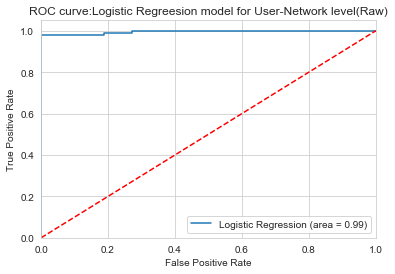

In [467]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test3, logreg.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test3, logreg.predict_proba(X_test3)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve:Logistic Regreesion model for User-Network level(Raw)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Decision Tree model 3

In [536]:
# Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'criterion': ['gini'],
              'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train3, y_train3)

# Set the clf to the best combination of parameters
clf3 = grid_obj.best_estimator_

clf3.fit(X_train3, y_train3)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [338]:
# To view the decision Tree

dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature3,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('User_Network_Tree.png')
Image(graph.create_png())
export_graphviz(clf3) 

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[8] <= 82.0\\ngini = 0.373\\nsamples = 1279\\nvalue = [962, 317]"] ;\n1 [label="X[10] <= 157.0\\ngini = 0.254\\nsamples = 362\\nvalue = [54, 308]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[9] <= 1.5\\ngini = 0.045\\nsamples = 43\\nvalue = [42, 1]"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 42\\nvalue = [42, 0]"] ;\n2 -> 4 ;\n5 [label="X[9] <= 38.5\\ngini = 0.072\\nsamples = 319\\nvalue = [12, 307]"] ;\n1 -> 5 ;\n6 [label="X[0] <= 439.5\\ngini = 0.019\\nsamples = 310\\nvalue = [3, 307]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 307\\nvalue = [0, 307]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n6 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 9\\nvalue = [9, 0]"] ;\n5 -> 9 ;\n10 [label="X[0] <= 0.375\\ngini = 0.019\\nsamples = 917\\nvalue = [908, 9]"] ;\n0 -> 10 [labeldistance=2.5, labelangle=-45, headlabel=

In [106]:
from sklearn.model_selection import cross_val_score
predictions3 = clf3.predict(X_test3)
print(accuracy_score(y_test3, predictions3))
print(np.array(cross_val_score(clf3, X_train3, y_train3, cv=10)).mean())
print(f1_score(y_test3,predictions3))

0.984375
0.991393851477141
0.9726775956284153


In [468]:
clf_probs3 = clf3.predict_proba(X_test3)[:, 1]
roc_value = roc_auc_score(y_test3, clf_probs3)
print(roc_value)

0.9846252860411898


In [ ]:
roc_value = roc_auc_score(y_test2, rf_probs2)
print(roc_value)

In [537]:
im3 = pd.DataFrame({'feature': list(X_train3.columns),
                   'importance': clf3.feature_importances_}).\
                    sort_values('importance', ascending = False)
im3

,feature,importance
8,statuses_count,0.772087
10,friends_count,0.165418
9,followers_count,0.041572
0,avg_friends_listed_count,0.016723
1,ff_ratio,0.004201
4,avg_friends_sn_length,0.000000
5,avg_friends_desc_length,0.000000
6,avg_friends_default_profile,0.000000
7,avg_friends_name_length,0.000000
3,avg_friends_profile_background_tile,0.000000


### Random Forest model 3

In [474]:
#Random forest model
rf_clf3 = RandomForestClassifier()

parameters = {'n_estimators': [10, 20, 25, 50, 100, 300, 500, 800] }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(rf_clf3, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train3, y_train3)

# Set the clf to the best combination of parameters
rf_clf3 = grid_obj.best_estimator_

rf_clf3.fit(X_train3, y_train3)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [477]:
from sklearn.ensemble import AdaBoostClassifier
ada3 = AdaBoostClassifier(base_estimator=rf_clf3, n_estimators=20)
ada3.fit(X_train3, y_train3)
y3 = ada3.predict(X_test3)
accuracy_score(y3, y_test3)

0.990625

In [388]:
a_svm3 = cross_val_score(ada3, X_train3, y_train3, cv=10)
print([a_svm3,np.mean(a_svm3)])

[array([1.        , 1.        , 0.9921875 , 1.        , 1.        ,
       1.        , 0.984375  , 0.99212598, 1.        , 0.99212598]), 0.9960814468503937]


In [478]:
rf_clf3_predictions = rf_clf3.predict(X_test3)
rf_probs3 = rf_clf3.predict_proba(X_test3)[:, 1]

In [479]:
roc_value = roc_auc_score(y_test3, rf_probs3)
print(roc_value)

0.9993564073226544


In [480]:
fi3 = pd.DataFrame({'feature': list(X_train3.columns),
                   'importance': rf_clf3.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi3

,feature,importance
0,avg_friends_listed_count,0.231277
8,statuses_count,0.231107
9,followers_count,0.147901
11,favourites_count,0.105385
10,friends_count,0.061816
6,avg_friends_default_profile,0.053478
13,default_profile,0.039868
12,listed_count,0.032747
3,avg_friends_profile_background_tile,0.021712
2,avg_friends_geo_enabled,0.018482


In [481]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test3,rf_clf3_predictions))
print(classification_report(y_test3,rf_clf3_predictions))
print(accuracy_score(y_test3, rf_clf3_predictions))

[[228   0]
 [  2  90]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       228
           1       1.00      0.98      0.99        92

    accuracy                           0.99       320
   macro avg       1.00      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

0.99375


# All dataset

In [339]:
#All.info()
All['avg_retweet_count'] = All['avg_retweet_count'].replace(np.nan, 0)
All['avg_favorite_count'] = All['avg_favorite_count'].replace(np.nan, 0)

All['avg_retweet_count'] = pd.to_numeric(All['avg_retweet_count'],errors='coerce')
All['avg_favorite_count'] = pd.to_numeric(All['avg_favorite_count'],errors='coerce')



In [227]:
#All.info()

In [540]:
from sklearn.preprocessing import StandardScaler
xset = Train
X_all = xset.drop(['id','Bot','friend_Bot_rate'], axis=1)
y_all = xset['Bot']

#initial
feature=['avg_ext_diversity', 'avg_retweet_count','avg_reply_count','avg_favorite_count','avg_num_hashtags',
      'avg_num_urls','avg_num_mentions','avg_in_apply','avg_friends_listed_count','avg_friends_default_profile',
      'avg_friends_geo_enabled','avg_friends_profile_background_tile','avg_friends_sn_length',
     'avg_friends_desc_length','avg_friends_name_length','ff_ratio','statuses_count','followers_count',
      'friends_count','favourites_count','listed_count','geo_enabled','profile_background_tile','sn_length',
      'desc_length','name_length']
#, 'friend_Bot_rate','friend_Bot_rate'
#deleted
#feature=['avg_ext_diversity','avg_retweet_count','avg_reply_count','avg_favorite_count','avg_num_hashtags',
#'avg_num_urls','avg_num_mentions','avg_in_apply','avg_friends_listed_count', 'avg_friends_default_profile', 
#'avg_friends_geo_enabled', 'avg_friends_profile_background_tile', 'avg_friends_sn_length',
#'avg_friends_desc_length','avg_friends_name_length']

X_train = xset[feature]
y_train = xset['Bot']
X_test = Test[feature]
y_test = Test['Bot']

fs_m = StandardScaler().fit(X_train)
Xs_train = fs_m.transform(X_train)
Xs_test = fs_m.transform(X_test)

In [342]:
fs_m = StandardScaler().fit(X_train)
Xs_train = fs_m.transform(X_train)
Xs_test = fs_m.transform(X_test)

In [484]:

#X_train['avg_retweet_count'] = X_train['avg_retweet_count'].replace(np.nan, 0)
#X_train.info()



In [384]:
#X_2 = X_train
#f,ax = plt.subplots(figsize=(14, 12))
#sns.heatmap(X_2.corr(), cmap='coolwarm', annot=True, linewidths=.5, fmt= '.1f',ax =ax,square=True)


### Logistic regression 4 

In [382]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,Xs_train)
result=logit_model.fit(maxiter=1000)
print(result.summary2())


         Current function value: inf
         Iterations: 1000


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [488]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the numb

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lb

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the numb

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.9928909952606635


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [489]:
logreg = LogisticRegression(C=10.0, penalty='l1')
#logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [490]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [491]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      0.99      0.99        72

    accuracy                           1.00       317
   macro avg       1.00      0.99      1.00       317
weighted avg       1.00      1.00      1.00       317



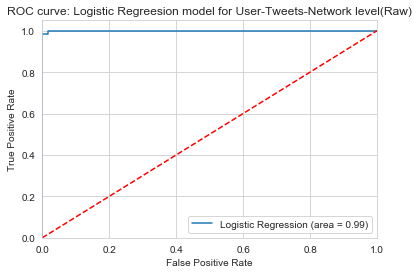

In [492]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: Logistic Regreesion model for User-Tweets-Network level(Raw)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Desicion Tree 4

In [541]:
 #Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'criterion': ['gini'],
              'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [542]:

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('User_Tweets_Network1.png')
Image(graph.create_png())
export_graphviz(clf) 

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[7] <= 0.007\\ngini = 0.381\\nsamples = 1266\\nvalue = [942, 324]"] ;\n1 [label="X[18] <= 147.5\\ngini = 0.077\\nsamples = 326\\nvalue = [13, 313]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[17] <= 3.5\\ngini = 0.142\\nsamples = 13\\nvalue = [12, 1]"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 12\\nvalue = [12, 0]"] ;\n2 -> 4 ;\n5 [label="X[6] <= 1.142\\ngini = 0.006\\nsamples = 313\\nvalue = [1, 312]"] ;\n1 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 312\\nvalue = [0, 312]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n5 -> 7 ;\n8 [label="X[4] <= 0.002\\ngini = 0.023\\nsamples = 940\\nvalue = [929, 11]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="X[18] <= 310.5\\ngini = 0.492\\nsamples = 16\\nvalue = [9, 7]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 9\\nvalue = [9, 0]"] ;

In [543]:
from sklearn.model_selection import cross_val_score
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(np.array(cross_val_score(clf, X_train, y_train, cv=10)).mean())
print(f1_score(y_test,predictions))

0.9936908517350158
0.9881572420634921
0.9863013698630138


In [544]:
clf_probs = clf.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, clf_probs)
print(roc_value)

0.9959183673469388


In [545]:
im4 = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
im4

,feature,importance
7,avg_in_apply,0.905637
18,friends_count,0.060309
4,avg_num_hashtags,0.012275
3,avg_favorite_count,0.008265
16,statuses_count,0.004155
6,avg_num_mentions,0.004146
17,followers_count,0.003840
0,avg_ext_diversity,0.001373
15,ff_ratio,0.000000
24,desc_length,0.000000


### Random Forest 4

In [499]:
#Random forest model
rf_clf = RandomForestClassifier()

parameters = {'n_estimators': [10, 20, 25, 50, 100, 300, 500, 800] }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(rf_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_clf = grid_obj.best_estimator_

rf_clf.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [500]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=20)
ada.fit(X_train, y_train)
y = ada.predict(X_test)
accuracy_score(y, y_test)

0.9968454258675079

In [501]:
rf_clf_predictions = rf_clf.predict(X_test)
rf_probs = rf_clf.predict_proba(X_test)[:, 1]

In [502]:
roc_value = roc_auc_score(y_test, rf_probs)
print(roc_value)

0.9999433106575965


In [503]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf_clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
6,avg_num_mentions,0.210205
19,favourites_count,0.181625
7,avg_in_apply,0.170526
16,statuses_count,0.168881
8,avg_friends_listed_count,0.064800
17,followers_count,0.055761
1,avg_retweet_count,0.030940
5,avg_num_urls,0.020665
20,listed_count,0.019279
18,friends_count,0.017455


In [504]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,rf_clf_predictions))
print(classification_report(y_test,rf_clf_predictions))
print(accuracy_score(y_test, rf_clf_predictions))

[[244   1]
 [  0  72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       0.99      1.00      0.99        72

    accuracy                           1.00       317
   macro avg       0.99      1.00      1.00       317
weighted avg       1.00      1.00      1.00       317

0.9968454258675079
